In [3]:
pip install cufflinks

     --------------------------------------- 81.7/81.7 kB 84.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68736 sha256=f7f5be62242d3fd19e3a72f68dc8add1e93af3ea64916f092b7a41416b186667
  Stored in directory: c:\users\home\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import cufflinks as cf

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
HeartDisease=pd.read_csv(r"C:\Users\Home\Downloads\HeartDiseasePrediction\Heart Disease Prediction\Dataset\HeartDisease.csv")

In [4]:
HeartDisease.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
HeartDisease.shape

(303, 14)

In [6]:
HeartDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
HeartDisease.target

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
HeartDisease.groupby('target').size()

target
0    138
1    165
dtype: int64

In [9]:
HeartDisease.groupby('gender').size()

gender
0     96
1    207
dtype: int64

In [10]:
HeartDisease.size

4242

In [11]:
HeartDisease.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Visualization

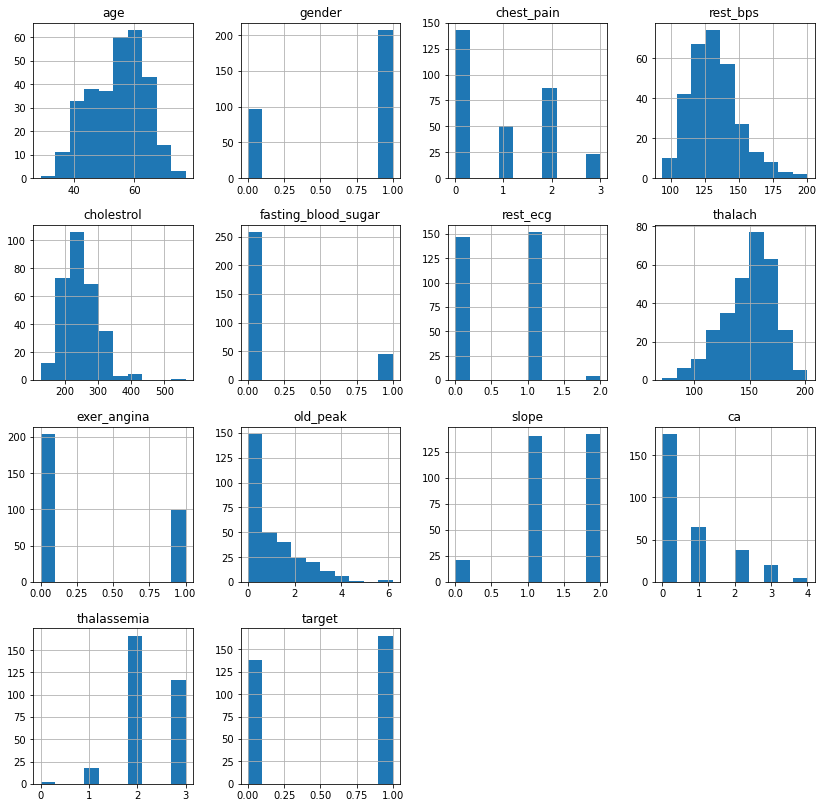

In [12]:
HeartDisease.hist(figsize=(14,14))
plt.show()

<AxesSubplot:xlabel='gender', ylabel='target'>

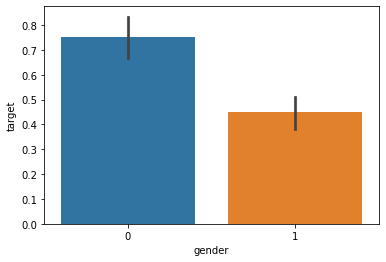

In [13]:
sns.barplot(HeartDisease['gender'],HeartDisease['target'])

<AxesSubplot:xlabel='gender', ylabel='age'>

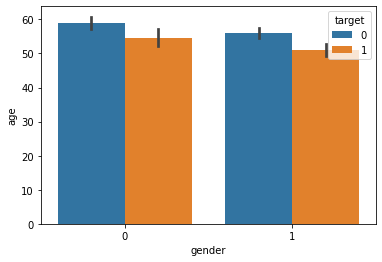

In [14]:
sns.barplot(HeartDisease['gender'],HeartDisease['age'],hue=HeartDisease['target'])

<AxesSubplot:xlabel='chest_pain', ylabel='target'>

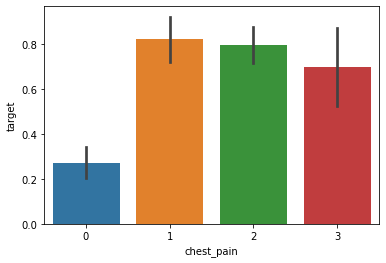

In [15]:
sns.barplot(HeartDisease['chest_pain'],HeartDisease['target'])

<AxesSubplot:xlabel='thalassemia', ylabel='Density'>

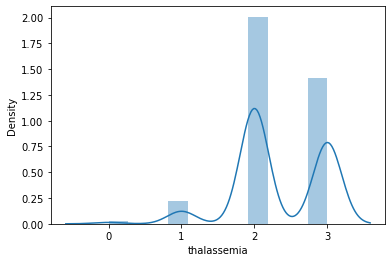

In [16]:
sns.distplot(HeartDisease['thalassemia'])

<AxesSubplot:xlabel='cholestrol', ylabel='Density'>

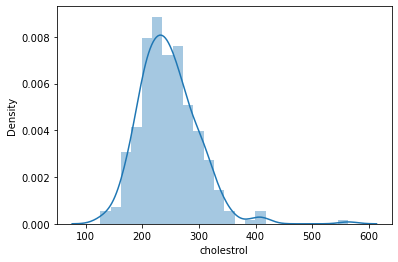

In [17]:
sns.distplot(HeartDisease['cholestrol'])

In [18]:
HeartDisease

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


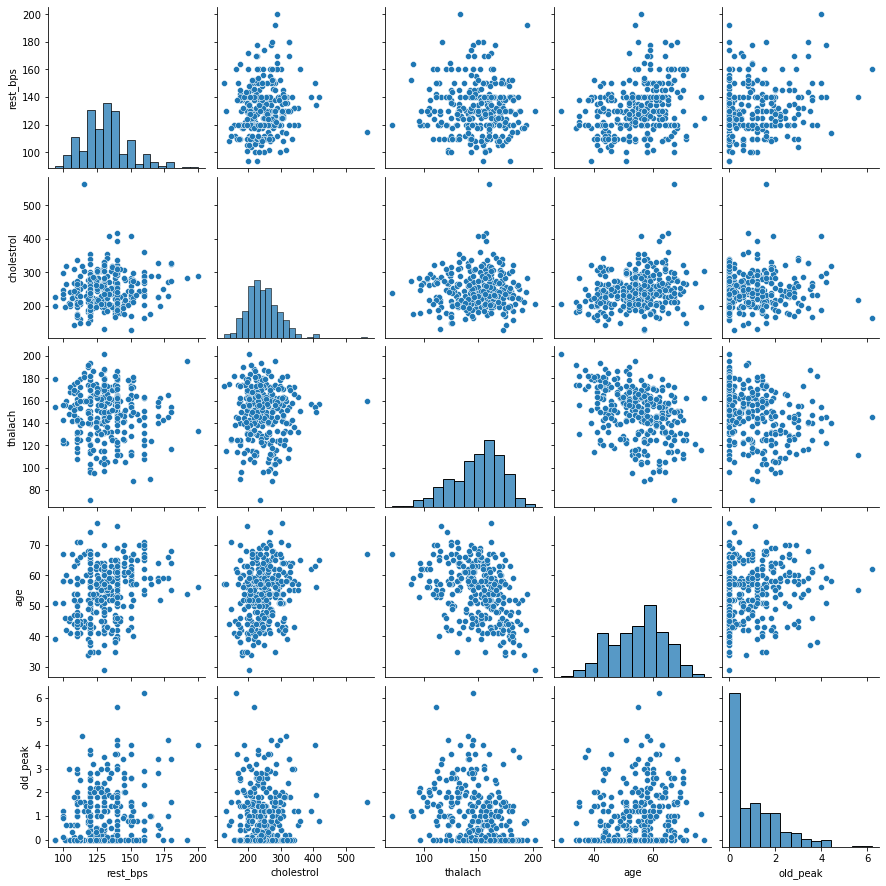

In [19]:
Numeric_columns=['rest_bps','cholestrol','thalach','age','old_peak']
sns.pairplot(HeartDisease[Numeric_columns])

1    165
0    138
Name: target, dtype: int64


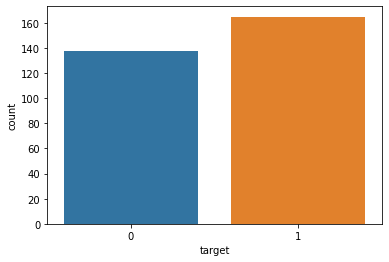

In [20]:
y=HeartDisease["target"]
sns.countplot(y)
target_temp=HeartDisease.target.value_counts()
print(target_temp)

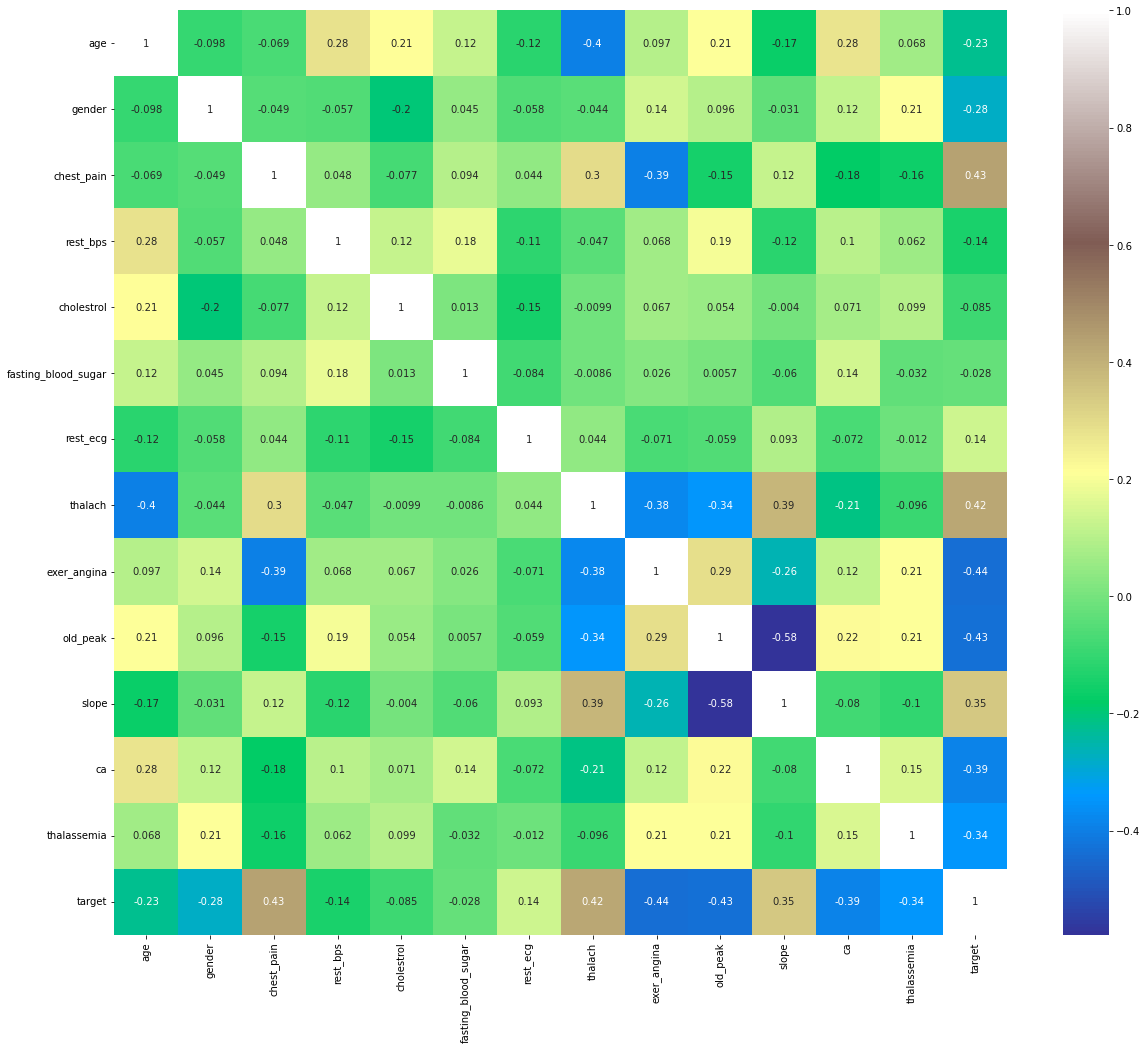

In [21]:
corrmat=HeartDisease.corr()
top_corr=corrmat.index

sns.heatmap(HeartDisease[top_corr].corr(),annot=True,cmap='terrain')
fig=plt.gcf()
fig.set_size_inches(20,17)


Text(0.5, 1.0, 'Maximum heart rate of patients with Heart Disease')

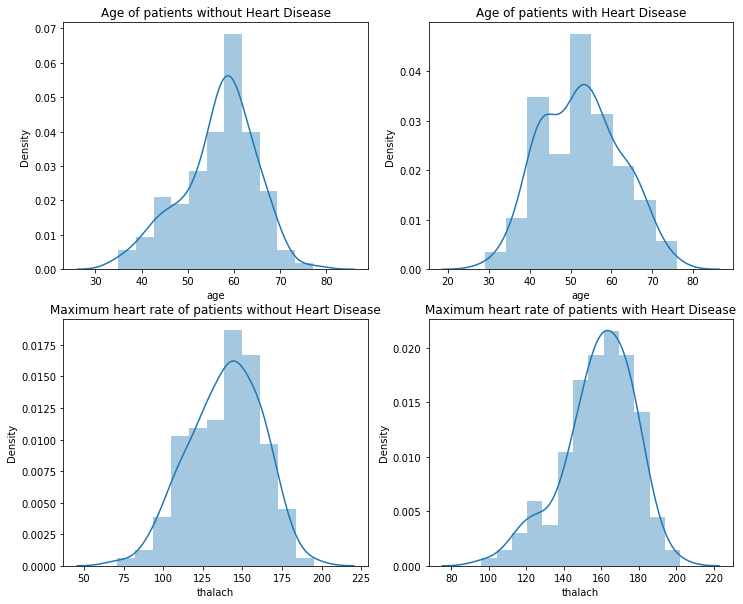

In [22]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(HeartDisease[HeartDisease['target']==0].age)
plt.title('Age of patients without Heart Disease')

plt.subplot(222)
sns.distplot(HeartDisease[HeartDisease['target']==1].age)
plt.title('Age of patients with Heart Disease')

plt.subplot(223)
sns.distplot(HeartDisease[HeartDisease['target']==0].thalach)
plt.title('Maximum heart rate of patients without Heart Disease')

plt.subplot(224)
sns.distplot(HeartDisease[HeartDisease['target']==1].thalach)
plt.title('Maximum heart rate of patients with Heart Disease')

<AxesSubplot:xlabel='target', ylabel='thalach'>

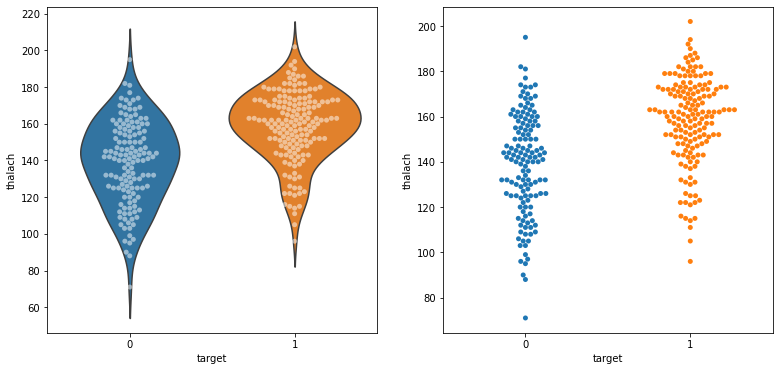

In [23]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x='target',y='thalach', data=HeartDisease, inner=None)
sns.swarmplot(x='target',y='thalach',data=HeartDisease,color='w',alpha=0.5)

plt.subplot(122)
sns.swarmplot(x='target',y='thalach',data=HeartDisease)

<AxesSubplot:xlabel='slope', ylabel='count'>

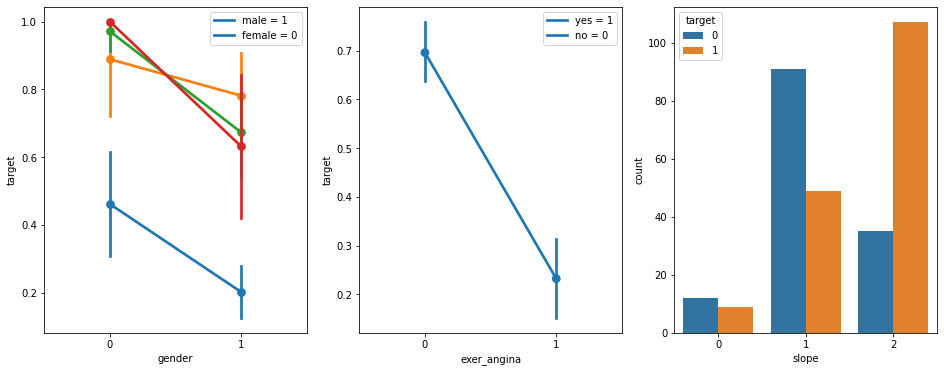

In [24]:
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x='gender',y='target',hue='chest_pain',data=HeartDisease)
plt.legend(['male = 1', 'female = 0'])

plt.subplot(132)
sns.pointplot(x='exer_angina',y='target',data=HeartDisease)
plt.legend(['yes = 1', 'no = 0'])

plt.subplot(133)
sns.countplot(x="slope", hue='target', data=HeartDisease)

In [25]:
X,y=HeartDisease.loc[:,:'thalassemia'],HeartDisease['target']

In [26]:
X

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [28]:
X.shape

(303, 13)

In [29]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=0.3)

In [31]:
X_train.shape

(212, 13)

In [32]:
X_test.shape

(91, 13)

# Decision Tree Classifier

In [33]:
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [34]:
prediction = dt.predict(X_test)
prediction

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0], dtype=int64)

In [35]:
accuracy_dt = accuracy_score(y_test,prediction)*100
accuracy_dt

76.92307692307693

In [36]:
dt.feature_importances_

array([0.05047671, 0.03495411, 0.35145358, 0.09882401, 0.10036299,
       0.        , 0.        , 0.07399763, 0.04771343, 0.04230023,
       0.08352965, 0.11083131, 0.00555635])

In [37]:
category = ['No you dont have Heart disease','Yes you have Heart disease']

In [38]:
custom_data = np.array([[57,0,0,140,241,0,1,123,1,0.2,1,0,3]])

In [39]:
custom_data_prediction_dt = dt.predict(custom_data)

In [40]:
custom_data_prediction_dt

array([0], dtype=int64)

In [41]:
print(category[int(custom_data_prediction_dt)])

No you dont have Heart disease


# K-Nearest Neighbor (KNN)

In [42]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
prediction_knn = knn.predict(X_test)

In [44]:
accuracy_knn = accuracy_score(y_test,prediction)*100
accuracy_knn

76.92307692307693

In [45]:
k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn = knn.predict(X_test)
    scores[k] = accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))

In [46]:
scores

{1: 0.7582417582417582,
 2: 0.8131868131868132,
 3: 0.8241758241758241,
 4: 0.8571428571428571,
 5: 0.8131868131868132,
 6: 0.8021978021978022,
 7: 0.8021978021978022,
 8: 0.8241758241758241,
 9: 0.7802197802197802,
 10: 0.7802197802197802,
 11: 0.7802197802197802,
 12: 0.7912087912087912,
 13: 0.8021978021978022,
 14: 0.8021978021978022,
 15: 0.7802197802197802,
 16: 0.7802197802197802,
 17: 0.7802197802197802,
 18: 0.7802197802197802,
 19: 0.7802197802197802,
 20: 0.7802197802197802,
 21: 0.7802197802197802,
 22: 0.7912087912087912,
 23: 0.7802197802197802,
 24: 0.7802197802197802,
 25: 0.7802197802197802}

In [47]:
scores_list

[0.7582417582417582,
 0.8131868131868132,
 0.8241758241758241,
 0.8571428571428571,
 0.8131868131868132,
 0.8021978021978022,
 0.8021978021978022,
 0.8241758241758241,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7912087912087912,
 0.8021978021978022,
 0.8021978021978022,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7912087912087912,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802]

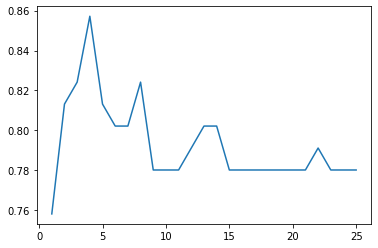

In [48]:
plt.plot(k_range,scores_list)

# LGBM Classifier

In [50]:
lg=LGBMClassifier(boosting_type='gbdt',n_estimators=5000,learning_rate=0.05,objective='binary',metric='accuracy',is_unbalance=True,
                 colsample_bytree=0.7,reg_lambda=3,reg_alpha=3,random_state=500,n_jobs=-1,num_leaves=35)
lg.fit(X_train,y_train)
ypred = lg.predict(X_test)
print('With score : ',accuracy_score(y_test,ypred)*100)

With score :  81.31868131868131


In [52]:
model = SVC(C=2.0,kernel='rbf',gamma='auto').fit(X_train,y_train)
Y_predict = model.predict(X_test)
print('Accuracy score : {}%'.format(accuracy_score(y_test,Y_predict)*100))

Accuracy score : 81.31868131868131%


# Random Forest Classifier

In [54]:
randomforest_classifier = RandomForestClassifier(n_estimators=10)
score = cross_val_score(randomforest_classifier,X,y,cv=10)

In [55]:
score.mean()

0.7991397849462365

In [56]:
algorithms = ['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn]

<AxesSubplot:>

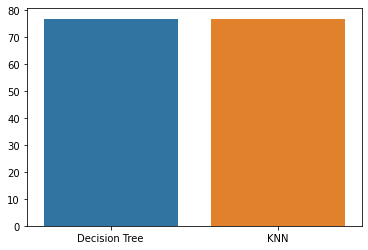

In [57]:
sns.barplot(algorithms,scores)